In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [2]:
plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

def savefig(fig: plt.Figure, filename: str, **kwargs) -> None:
    save_path = os.path.join(plots_dir, filename)
    fig.savefig(save_path, dpi=300, bbox_inches='tight', **kwargs)

In [3]:
df = pd.read_csv("../../ernestogym/ernesto/data/demand/train.csv")

In [4]:
df = df.drop(columns=['delta_time'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Data to kWh from Wh
df.loc[:, df.columns != 'timestamp'] /= 1000
df['avg_profile'] = df.loc[:, df.columns != 'timestamp'].mean(axis=1)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,...,66,68,69,70,71,72,73,74,timestamp,avg_profile
0,0.095,0.501,0.403,0.061,0.357,0.057,0.289,0.738,0.642,1.254,...,0.540,0.478,0.497,0.044,0.624,0.539,0.287,0.229,2010-01-01 00:00:00,0.545192
1,0.095,0.479,0.425,0.061,0.354,0.044,0.341,0.739,0.642,1.421,...,0.506,0.481,0.491,0.044,0.585,0.535,0.287,0.229,2010-01-01 00:01:00,0.478123
2,0.095,0.449,0.460,0.061,0.354,0.044,0.533,0.734,0.638,1.395,...,0.140,0.479,0.494,0.044,0.585,0.532,0.246,0.229,2010-01-01 00:02:00,0.472945
3,0.095,0.463,0.488,0.061,0.353,0.044,0.493,0.732,0.637,1.395,...,0.105,0.479,0.492,0.043,0.577,0.538,0.292,0.228,2010-01-01 00:03:00,0.468041
4,0.099,0.404,0.543,0.061,0.300,0.044,0.505,0.730,0.639,0.668,...,0.104,0.472,0.493,0.043,1.847,0.701,0.269,0.228,2010-01-01 00:04:00,0.501795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,0.220,1.306,1.625,0.266,0.525,0.182,0.135,0.771,0.167,0.616,...,0.288,0.455,0.643,0.142,0.135,0.435,0.218,0.634,2010-12-31 23:55:00,0.519315
525596,0.221,2.065,1.626,0.265,0.525,0.185,0.135,0.770,0.167,0.615,...,0.287,0.430,0.642,0.146,0.135,0.406,0.231,0.554,2010-12-31 23:56:00,0.580110
525597,0.220,1.368,1.621,0.264,0.533,0.179,0.135,0.766,0.167,0.710,...,0.287,0.449,0.641,0.143,0.134,0.351,0.376,0.712,2010-12-31 23:57:00,0.541986
525598,0.219,0.194,1.593,0.264,0.559,0.226,0.135,0.763,0.167,0.704,...,0.285,1.305,0.641,0.142,0.134,0.349,0.377,0.839,2010-12-31 23:58:00,0.532781


In [6]:
# Create a Seasonal Dictionary that will map months to seasons
season_dict = {11: 'autumn', 12: 'winter', 1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', \
8: 'summer', 9: 'autumn', 10: 'autumn'}

In [7]:
df['day'] = df.timestamp.dt.day_of_year
df['month'] = df.timestamp.dt.month
df['season'] = [season_dict[m] for m in df.month]
df

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,timestamp,avg_profile,day,month,season
0,0.095,0.501,0.403,0.061,0.357,0.057,0.289,0.738,0.642,1.254,...,0.044,0.624,0.539,0.287,0.229,2010-01-01 00:00:00,0.545192,1,1,winter
1,0.095,0.479,0.425,0.061,0.354,0.044,0.341,0.739,0.642,1.421,...,0.044,0.585,0.535,0.287,0.229,2010-01-01 00:01:00,0.478123,1,1,winter
2,0.095,0.449,0.460,0.061,0.354,0.044,0.533,0.734,0.638,1.395,...,0.044,0.585,0.532,0.246,0.229,2010-01-01 00:02:00,0.472945,1,1,winter
3,0.095,0.463,0.488,0.061,0.353,0.044,0.493,0.732,0.637,1.395,...,0.043,0.577,0.538,0.292,0.228,2010-01-01 00:03:00,0.468041,1,1,winter
4,0.099,0.404,0.543,0.061,0.300,0.044,0.505,0.730,0.639,0.668,...,0.043,1.847,0.701,0.269,0.228,2010-01-01 00:04:00,0.501795,1,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,0.220,1.306,1.625,0.266,0.525,0.182,0.135,0.771,0.167,0.616,...,0.142,0.135,0.435,0.218,0.634,2010-12-31 23:55:00,0.519315,365,12,winter
525596,0.221,2.065,1.626,0.265,0.525,0.185,0.135,0.770,0.167,0.615,...,0.146,0.135,0.406,0.231,0.554,2010-12-31 23:56:00,0.580110,365,12,winter
525597,0.220,1.368,1.621,0.264,0.533,0.179,0.135,0.766,0.167,0.710,...,0.143,0.134,0.351,0.376,0.712,2010-12-31 23:57:00,0.541986,365,12,winter
525598,0.219,0.194,1.593,0.264,0.559,0.226,0.135,0.763,0.167,0.704,...,0.142,0.134,0.349,0.377,0.839,2010-12-31 23:58:00,0.532781,365,12,winter


In [8]:
df_winter = df[df['season'] == 'winter']
df_summer = df[df['season'] == 'summer']

In [9]:
df_mean = []
df_std = []

df_mean.append(df_winter.groupby([df_winter.timestamp.dt.hour]).mean())
df_mean.append(df_summer.groupby([df_summer.timestamp.dt.hour]).mean())

df_std.append(df_winter.groupby([df_winter.timestamp.dt.hour]).std())
df_std.append(df_summer.groupby([df_summer.timestamp.dt.hour]).std())

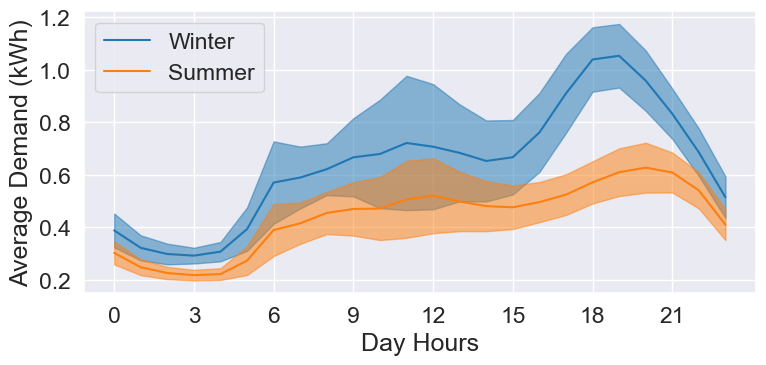

In [10]:
# Plot of DAILY AVERAGE DEMAND in different season of the year
col = 'avg_profile'

fig, ax = plt.subplots( figsize=(8, 4), tight_layout=True, sharey=True)

idx = 0
ax.plot(df_mean[idx].index, df_mean[idx][col], label='Winter', color='tab:blue')
ax.fill_between(df_mean[idx].index, df_mean[idx][col] - df_std[idx][col], df_mean[idx][col] + df_std[idx][col], color='tab:blue', alpha=0.5)

idx = 1
ax.plot(df_mean[idx].index, df_mean[idx][col], label='Summer', color='tab:orange')
ax.fill_between(df_mean[idx].index, df_mean[idx][col] - df_std[idx][col], df_mean[idx][col] + df_std[idx][col], color='tab:orange', alpha=0.5)

ax.set(xlabel='Day Hours', ylabel='Average Demand (kWh)', xticks=df_mean[idx].index[::3])
ax.legend()

savefig(fig, filename='winter_summer_demand.pdf')
savefig(fig, filename='winter_summer_demand.png')


In [11]:
df_weekly_mean = df.groupby([df.timestamp.dt.isocalendar().week]).mean()
df_weekly_std = df.groupby([df.timestamp.dt.isocalendar().week]).std()

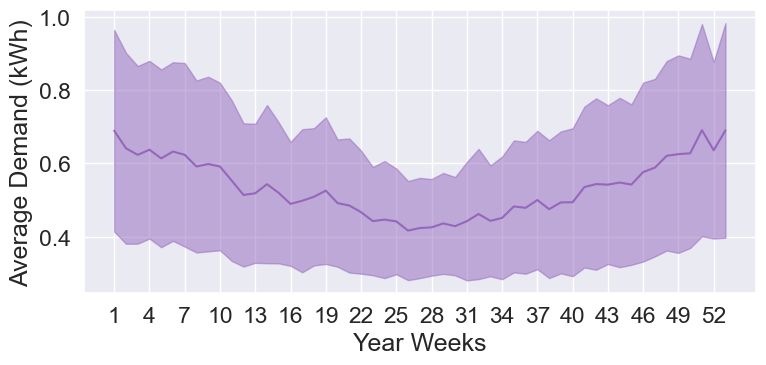

In [12]:
# Plot of AVERAGE DEMAND during the year
col = 'avg_profile'

fig, ax = plt.subplots( figsize=(8, 4), tight_layout=True, sharey=True)

ax.plot(df_weekly_mean.index, df_weekly_mean[col], label='Avg Profile', color='tab:purple')
ax.fill_between(list(df_weekly_std.index), df_weekly_mean[col] - df_weekly_std[col],  df_weekly_mean[col] + df_weekly_std[col], color='tab:purple', alpha=0.5)

ax.set(xlabel='Year Weeks', ylabel='Average Demand (kWh)', xticks=list(df_weekly_mean.index[::3]))

savefig(fig, filename='demand_per_year_week.pdf')
savefig(fig, filename='demand_per_year_week.png')


[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Demand (kWh)'),

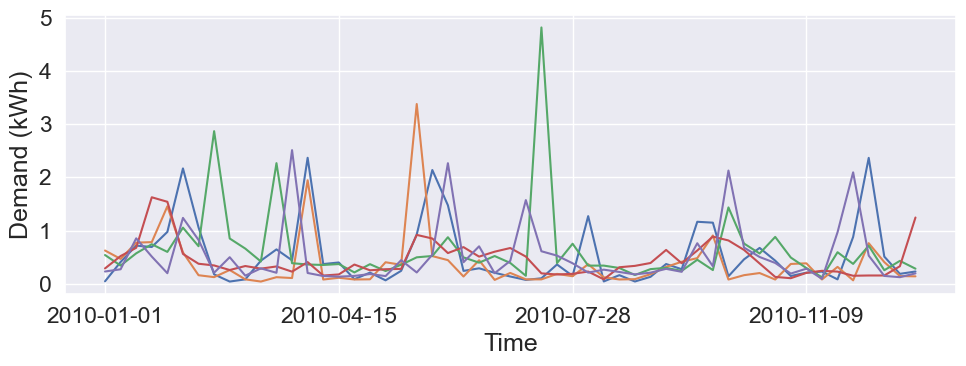

In [25]:
# Plot of AVERAGE DEMAND during the year
cols = ['70', '71', '72', '73', '74'] 
plot_colors = sns.color_palette()

fig, ax = plt.subplots( figsize=(10, 4), tight_layout=True, sharey=True)

for i, col in enumerate(cols):
    ax.plot(df['timestamp'][::10000], df[col][::10000], label='Profile {}'.format(col), color=plot_colors[i])

ax.set(xlabel='Time', ylabel='Demand (kWh)', xticks=list(df['timestamp'][::150000]))

#savefig(fig, filename='demand_per_year_week.pdf')
#savefig(fig, filename='demand_per_year_week.png')
